In [10]:
#import pybedtools

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
#import seaborn.objects as so

from scipy.stats import pearsonr, spearmanr
import glob

# Target Gene Expression

In [9]:
path_heatmap = r"CSV_Heatmap_traget_genes.csv"
path_id_count = r"CSV_tf_id_count.csv"

In [15]:
df = pd.read_csv(path_heatmap).rename(columns={"Unnamed: 0" : ""}).set_index("")
id_count = pd.read_csv(path_id_count).set_index("tf")["geneID"]
# id_count["Column Mean"] = 17304

In [12]:
df

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood,Row Mean
,,,,,,,,,,,,,,,,,,,,,
All Genes,2.573793,2.487600,2.163193,2.659590,2.656233,2.570915,2.661928,1.776876,1.955428,1.967896,...,2.639282,2.566934,2.586250,2.160239,3.218005,2.935713,2.862643,2.845472,0.894892,2.329998
AR,3.420831,3.291073,3.092793,3.501410,3.496182,3.462804,3.548230,2.463566,2.653196,2.674123,...,3.501643,3.378551,3.388141,3.023544,3.949650,3.814676,3.760144,3.677671,1.636552,3.161365
ARNT,3.431647,3.298134,3.089342,3.521907,3.516800,3.488125,3.564901,2.536926,2.754313,2.763407,...,3.548369,3.365862,3.406420,2.988356,4.033774,3.817342,3.784537,3.705825,1.663018,3.193311
ARNTL,3.888441,3.702171,3.623384,3.943046,3.981699,4.084618,3.910816,2.918904,3.001732,3.049413,...,3.988931,3.732034,3.746455,3.387585,4.482041,4.119893,4.095859,3.926347,1.922255,3.568817
ASCL1,2.871638,2.743776,2.570522,2.978152,2.994517,2.894464,3.018092,2.065521,2.297008,2.300031,...,3.108837,2.943776,2.915891,2.579340,3.556998,3.396916,3.145980,3.202790,1.151143,2.706240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YY2,3.947254,3.772117,3.671533,4.046747,4.030437,4.021007,4.035994,2.951955,3.163771,3.183541,...,3.972847,3.797988,3.971173,3.453614,4.647121,4.280309,4.363108,4.125445,2.335885,3.691239
ZFX,4.028346,3.861831,3.627951,4.092485,4.061392,4.018208,4.085256,2.852873,3.014604,3.089167,...,4.007728,3.892706,3.990824,3.497138,4.464322,4.349308,4.354746,4.175782,2.271405,3.672755
ZNF143,3.418908,3.280622,3.128250,3.521017,3.507290,3.448427,3.568365,2.564329,2.766983,2.792375,...,3.532862,3.368547,3.422506,3.012997,4.043300,3.836206,3.778798,3.715975,1.614203,3.200974


## Reduce DataFrame

In [7]:
mean_row = ["All Genes"]

tf_most_target_genes = ['MYC', 'ESR1', 'SP1', 'CTCF', 'E2F1', 'MAX', 'RUNX1', 'TFAP2C', 'AR', 'KLF5', 'JUN', 'RELA', 'MYCN', 'CREB1', 'E2F6', 'SP2']

tf_smallest_expr = ["NR1H4", "SOX10", "HNF1B", "HNF1A", "ISL1"]
tf_biggest_expr = ["NR5A1", "XBP1", "TFEB", "HSF2", "NR2C1"]

## Most Target Gens

In [19]:
df_plot = df.loc[mean_row + tf_most_target_genes]
id_count_plot = id_count.loc[tf_most_target_genes]

In [179]:
df_plot = (df_plot / df_plot.loc["All Genes"]).apply(func=lambda x: x / x["Row Mean"], axis=1)
# df_plot

### Plots

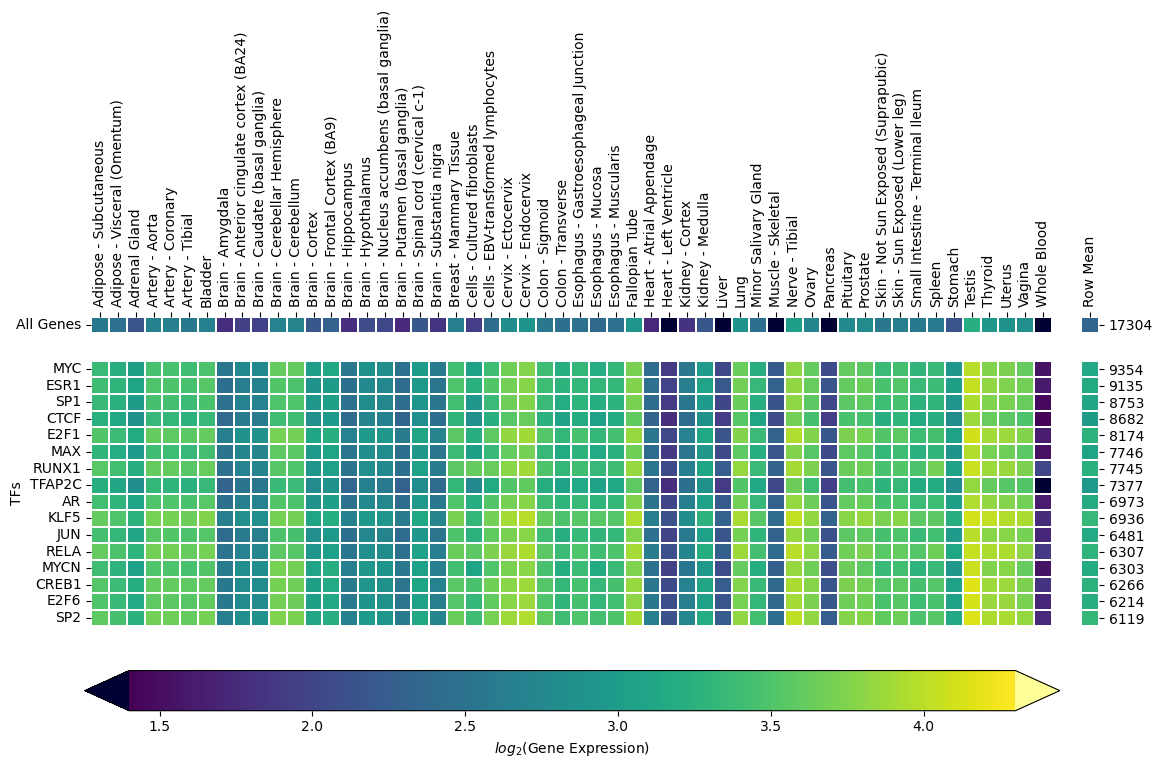

In [186]:
value_min = 1.4
value_max = 4.3

my_cmap = plt.get_cmap("viridis").copy()
my_cmap.set_over("#FFFF99")
my_cmap.set_under("#000033")
norm = mpl.colors.Normalize(vmin= value_min, vmax= value_max)

asp = df_plot.shape[0]/float(df_plot.shape[1])
figw = 13
figh = figw*asp


gridspec_kw = {"height_ratios":[1,len(df_plot)], "width_ratios" : [54,1]}
heatmapkws = dict(square=False, cbar=False,  cmap=my_cmap, fmt=".2f", linewidths=0.01, vmin= value_min, vmax= value_max, robust=True)


fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(figw, figh), gridspec_kw=gridspec_kw)

# left = 0.07; right=0.87
# bottom = 0.1; top = 0.9

plt.subplots_adjust(wspace=0.06, hspace=0.2)



# sns.heatmap(mean_log2_expr_per_tissue_copy, cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"$log_2$(Gene Expression)", "extend":"both"}, vmin= value_min, vmax= value_max, robust=True)
# Mean over all tissues - row
sns.heatmap(df_plot.iloc[:1,:54], ax=axes[0,0], xticklabels=True, yticklabels=True,  **heatmapkws)

# Mean over all Target genes - column
sns.heatmap(df_plot.iloc[1:,54:], ax=axes[1,1], xticklabels=True, yticklabels=True,  **heatmapkws)
# Normal heatmap
sns.heatmap(df_plot.iloc[1:,:54], ax=axes[1,0], xticklabels=True, yticklabels=True,  **heatmapkws)
# mean gene expr over all
sns.heatmap(df_plot.iloc[:1,54:], ax=axes[0,1], xticklabels=True, yticklabels=True,  **heatmapkws)


# axes[0,0].set_xlabel('Tissues')
axes[1,0].set_ylabel('TFs')

# oben mean tissues, x-ticks rotieren und nach oben, unten weg, y-ticks auf keine rotation
axes[0,0].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,0].tick_params(axis="y", labelrotation=0)

# kleines rechteck oben rechts, x ticks drehen und nach oben, unten entfernen, y1-ticks entfernen, y2-ticks auf rechte seite durch len(df_red) also anzahl Target gene insgesamt
axes[0,1].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,1].tick_params(axis="y", labelrotation=90)
axes[0,1].set_ylim([0,axes[0,1].get_ylim()[0]])
axes[0,1].set_yticks(axes[0,1].get_yticks())
axes[0,1].set_yticklabels([17304])
axes[0,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)

# Main Heatmap, x ticks entfernen, y-ticks lassen
axes[1,0].set_xticklabels([])
axes[1,0].set_xticks([])

# rechte lange Spalte
# Hinzufügern der y2-beschriftung mit tf_id_count, entfernen der y1-ticks etc, entfernen der x-ticks
axes[1,1].set_yticks(axes[1,1].get_yticks())
axes[1,1].set_yticklabels(id_count_plot.values)
axes[1,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)
axes[1,1].set_xticklabels([])
axes[1,1].set_xticks([])



# Colorbar
# cax = fig.add_axes([0.12, 0.9, 0.8, 0.01])
cax = fig.add_axes([0.12,-.1,0.75,0.1])
sm = mpl.cm.ScalarMappable(cmap=my_cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cax, extend='both', orientation="horizontal", location="bottom", label="$log_2$(Gene Expression)")
# plt.tight_layout()
# plt.savefig(r"../images_BA/target_gene_heatmap_most_target_genes.pdf", bbox_inches = 'tight')

## Biggest_smallest_expr

In [198]:
df_plot = df.loc[ mean_row + tf_biggest_expr+tf_smallest_expr]
id_count_plot = id_count.loc[tf_biggest_expr+tf_smallest_expr]

In [196]:

# df_plot

### Plot

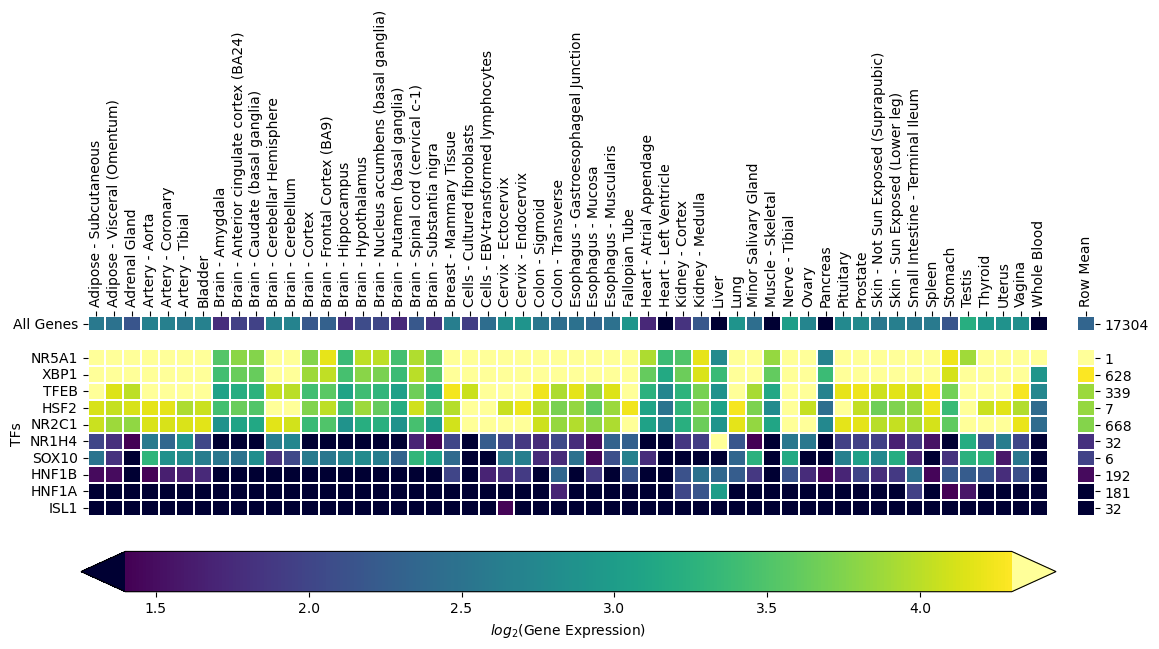

In [202]:
value_min = 1.4
value_max = 4.3

my_cmap = plt.get_cmap("viridis").copy()
my_cmap.set_over("#FFFF99")
my_cmap.set_under("#000033")
norm = mpl.colors.Normalize(vmin= value_min, vmax= value_max)

asp = df_plot.shape[0]/float(df_plot.shape[1])
figw = 13
figh = figw*asp


gridspec_kw = {"height_ratios":[1,len(df_plot)], "width_ratios" : [54,1]}
heatmapkws = dict(square=False, cbar=False,  cmap=my_cmap, fmt=".2f", linewidths=0.01, vmin= value_min, vmax= value_max, robust=True)


fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(figw, figh), gridspec_kw=gridspec_kw)

# left = 0.07; right=0.87
# bottom = 0.1; top = 0.9

plt.subplots_adjust(wspace=0.06, hspace=0.2)



# sns.heatmap(mean_log2_expr_per_tissue_copy, cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"$log_2$(Gene Expression)", "extend":"both"}, vmin= value_min, vmax= value_max, robust=True)
# Mean over all tissues - row
sns.heatmap(df_plot.iloc[:1,:54], ax=axes[0,0], xticklabels=True, yticklabels=True,  **heatmapkws)

# Mean over all Target genes - column
sns.heatmap(df_plot.iloc[1:,54:], ax=axes[1,1], xticklabels=True, yticklabels=True,  **heatmapkws)
# Normal heatmap
sns.heatmap(df_plot.iloc[1:,:54], ax=axes[1,0], xticklabels=True, yticklabels=True,  **heatmapkws)
# mean gene expr over all
sns.heatmap(df_plot.iloc[:1,54:], ax=axes[0,1], xticklabels=True, yticklabels=True,  **heatmapkws)


# axes[0,0].set_xlabel('Tissues')
axes[1,0].set_ylabel('TFs')

# oben mean tissues, x-ticks rotieren und nach oben, unten weg, y-ticks auf keine rotation
axes[0,0].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,0].tick_params(axis="y", labelrotation=0)

# kleines rechteck oben rechts, x ticks drehen und nach oben, unten entfernen, y1-ticks entfernen, y2-ticks auf rechte seite durch len(df_red) also anzahl Target gene insgesamt
axes[0,1].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,1].tick_params(axis="y", labelrotation=90)
axes[0,1].set_ylim([0,axes[0,1].get_ylim()[0]])
axes[0,1].set_yticks(axes[0,1].get_yticks())
axes[0,1].set_yticklabels([17304])
axes[0,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)

# Main Heatmap, x ticks entfernen, y-ticks lassen
axes[1,0].set_xticklabels([])
axes[1,0].set_xticks([])

# rechte lange Spalte
# Hinzufügern der y2-beschriftung mit tf_id_count, entfernen der y1-ticks etc, entfernen der x-ticks
axes[1,1].set_yticks(axes[1,1].get_yticks())
axes[1,1].set_yticklabels(id_count_plot.values)
axes[1,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)
axes[1,1].set_xticklabels([])
axes[1,1].set_xticks([])



# Colorbar
# cax = fig.add_axes([0.12, 0.9, 0.8, 0.01])
cax = fig.add_axes([0.12,-.18,0.75,0.155])
sm = mpl.cm.ScalarMappable(cmap=my_cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cax, extend='both', orientation="horizontal", location="bottom", label="$log_2$(Gene Expression)")
# plt.tight_layout()
# plt.savefig(r"../images/target_gene_heatmap_biggest_smallest_meanExpr_NORMAL.png", bbox_inches = 'tight')

## Combined PLots

In [21]:
extreme_df_plot = df.loc[ mean_row + tf_biggest_expr+tf_smallest_expr]
extreme_id_count_plot = id_count.loc[tf_biggest_expr+tf_smallest_expr]

In [219]:
extreme_df_plot.shape

(11, 55)

In [23]:
most_df_plot = df.loc[mean_row + tf_most_target_genes]
most_id_count_plot = id_count.loc[tf_most_target_genes]

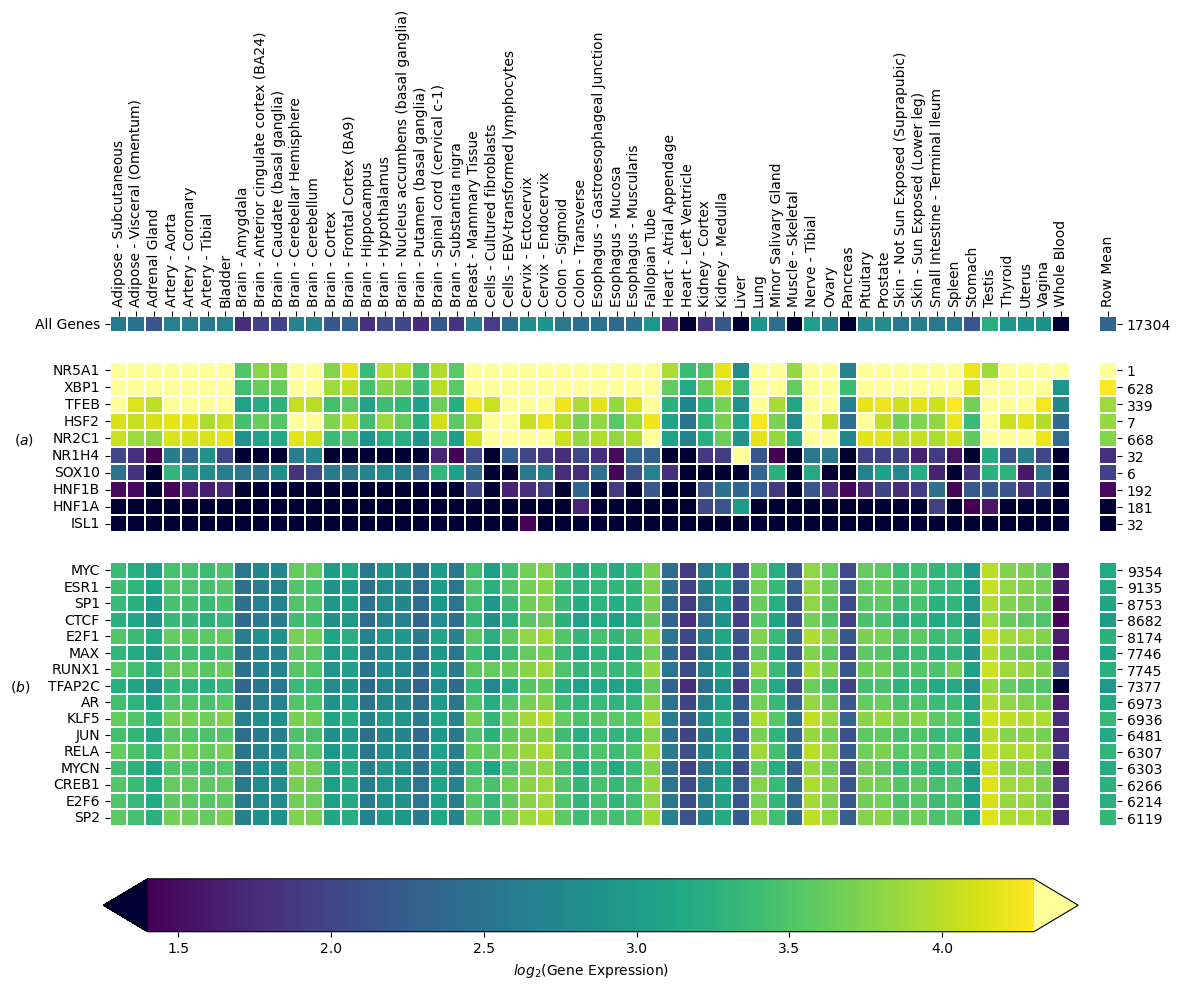

In [261]:
value_min = 1.4
value_max = 4.3

my_cmap = plt.get_cmap("viridis").copy()
my_cmap.set_over("#FFFF99")
my_cmap.set_under("#000033")
norm = mpl.colors.Normalize(vmin= value_min, vmax= value_max)

asp = (extreme_df_plot.shape[0] + most_df_plot.shape[0]) /float(extreme_df_plot.shape[1])
figw = 13
figh = figw*asp


gridspec_kw = {"height_ratios":[1,len(extreme_df_plot), len(most_df_plot)], "width_ratios" : [54,1]}
heatmapkws = dict(square=False, cbar=False,  cmap=my_cmap, fmt=".2f", linewidths=0.01, vmin= value_min, vmax= value_max, robust=True)


fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(figw, figh), gridspec_kw=gridspec_kw)

# left = 0.07; right=0.87
# bottom = 0.1; top = 0.9

plt.subplots_adjust(wspace=0.06, hspace=0.2)



# sns.heatmap(mean_log2_expr_per_tissue_copy, cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"$log_2$(Gene Expression)", "extend":"both"}, vmin= value_min, vmax= value_max, robust=True)
# Mean over all tissues - row
sns.heatmap(extreme_df_plot.iloc[:1,:54], ax=axes[0,0], xticklabels=True, yticklabels=True,  **heatmapkws)

# Mean over all Target genes - column
sns.heatmap(extreme_df_plot.iloc[1:,54:], ax=axes[1,1], xticklabels=True, yticklabels=True,  **heatmapkws)
# Normal heatmap
sns.heatmap(extreme_df_plot.iloc[1:,:54], ax=axes[1,0], xticklabels=True, yticklabels=True,  **heatmapkws)
# mean gene expr over all
sns.heatmap(extreme_df_plot.iloc[:1,54:], ax=axes[0,1], xticklabels=True, yticklabels=True,  **heatmapkws)


# PLOT 2

# Mean over all Target genes - column
sns.heatmap(most_df_plot.iloc[1:,54:], ax=axes[2,1], xticklabels=True, yticklabels=True,  **heatmapkws)
# Normal heatmap
sns.heatmap(most_df_plot.iloc[1:,:54], ax=axes[2,0], xticklabels=True, yticklabels=True,  **heatmapkws)



# axes[0,0].set_xlabel('Tissues')
axes[1,0].set_ylabel('$(a)$', rotation=0, labelpad = 20)

# oben mean tissues, x-ticks rotieren und nach oben, unten weg, y-ticks auf keine rotation
axes[0,0].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,0].tick_params(axis="y", labelrotation=0)

# kleines rechteck oben rechts, x ticks drehen und nach oben, unten entfernen, y1-ticks entfernen, y2-ticks auf rechte seite durch len(df_red) also anzahl Target gene insgesamt
axes[0,1].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,1].tick_params(axis="y", labelrotation=90)
axes[0,1].set_ylim([0,axes[0,1].get_ylim()[0]])
axes[0,1].set_yticks(axes[0,1].get_yticks())
axes[0,1].set_yticklabels([17304])
axes[0,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)

# Main Heatmap, x ticks entfernen, y-ticks lassen
axes[1,0].set_xticklabels([])
axes[1,0].set_xticks([])

# rechte lange Spalte
# Hinzufügern der y2-beschriftung mit tf_id_count, entfernen der y1-ticks etc, entfernen der x-ticks
axes[1,1].set_yticks(axes[1,1].get_yticks())
axes[1,1].set_yticklabels(extreme_id_count_plot.values)
axes[1,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)
axes[1,1].set_xticklabels([])
axes[1,1].set_xticks([])


# PLOT 2 AXES

axes[2,0].set_ylabel('$(b)$', rotation=0, labelpad = 20)
# Main Heatmap, x ticks entfernen, y-ticks lassen
axes[2,0].set_xticklabels([])
axes[2,0].set_xticks([])

# rechte lange Spalte
# Hinzufügern der y2-beschriftung mit tf_id_count, entfernen der y1-ticks etc, entfernen der x-ticks
axes[2,1].set_yticks(axes[2,1].get_yticks())
axes[2,1].set_yticklabels(most_id_count_plot.values)
axes[2,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)
axes[2,1].set_xticklabels([])
axes[2,1].set_xticks([])


# Colorbar
# cax = fig.add_axes([0.12, 0.9, 0.8, 0.01])
cax = fig.add_axes([0.12,-.05,0.75,0.08])
sm = mpl.cm.ScalarMappable(cmap=my_cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cax, extend='both', orientation="horizontal", location="bottom", label="$log_2$(Gene Expression)")
# plt.tight_layout()
# plt.savefig(r"../images_BA/target_gene_heatmap_extreme_and_most.pdf", bbox_inches = 'tight')

## Plot Normalized

In [27]:
extreme_df_plot = (extreme_df_plot / extreme_df_plot.loc["All Genes"]).apply(func=lambda x: x / x["Row Mean"], axis=1)
most_df_plot = (most_df_plot / most_df_plot.loc["All Genes"]).apply(func=lambda x: x / x["Row Mean"], axis=1)

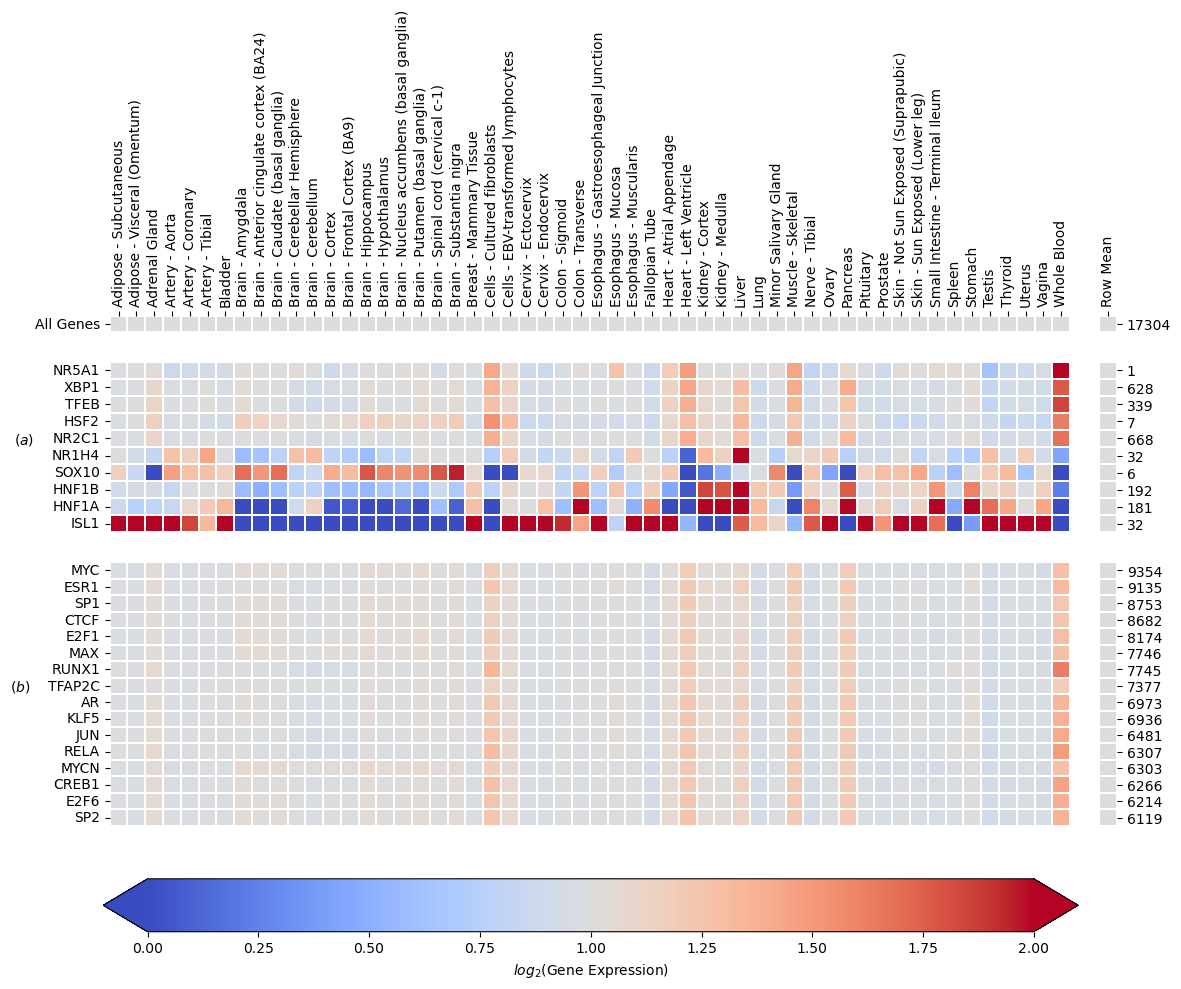

In [35]:
value_min = 0
value_max = 2

my_cmap = plt.get_cmap("coolwarm").copy()
# my_cmap.set_over("#FFFF99")
# my_cmap.set_under("#000033")
norm = mpl.colors.Normalize(vmin= value_min, vmax= value_max)

asp = (extreme_df_plot.shape[0] + most_df_plot.shape[0]) /float(extreme_df_plot.shape[1])
figw = 13
figh = figw*asp


gridspec_kw = {"height_ratios":[1,len(extreme_df_plot), len(most_df_plot)], "width_ratios" : [54,1]}
heatmapkws = dict(square=False, cbar=False,  cmap=my_cmap, fmt=".2f", linewidths=0.01, vmin= value_min, vmax= value_max, robust=True)


fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(figw, figh), gridspec_kw=gridspec_kw)

# left = 0.07; right=0.87
# bottom = 0.1; top = 0.9

plt.subplots_adjust(wspace=0.06, hspace=0.2)



# sns.heatmap(mean_log2_expr_per_tissue_copy, cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"$log_2$(Gene Expression)", "extend":"both"}, vmin= value_min, vmax= value_max, robust=True)
# Mean over all tissues - row
sns.heatmap(extreme_df_plot.iloc[:1,:54], ax=axes[0,0], xticklabels=True, yticklabels=True,  **heatmapkws)

# Mean over all Target genes - column
sns.heatmap(extreme_df_plot.iloc[1:,54:], ax=axes[1,1], xticklabels=True, yticklabels=True,  **heatmapkws)
# Normal heatmap
sns.heatmap(extreme_df_plot.iloc[1:,:54], ax=axes[1,0], xticklabels=True, yticklabels=True,  **heatmapkws)
# mean gene expr over all
sns.heatmap(extreme_df_plot.iloc[:1,54:], ax=axes[0,1], xticklabels=True, yticklabels=True,  **heatmapkws)


# PLOT 2

# Mean over all Target genes - column
sns.heatmap(most_df_plot.iloc[1:,54:], ax=axes[2,1], xticklabels=True, yticklabels=True,  **heatmapkws)
# Normal heatmap
sns.heatmap(most_df_plot.iloc[1:,:54], ax=axes[2,0], xticklabels=True, yticklabels=True,  **heatmapkws)



# axes[0,0].set_xlabel('Tissues')
axes[1,0].set_ylabel('$(a)$', rotation=0, labelpad = 20)

# oben mean tissues, x-ticks rotieren und nach oben, unten weg, y-ticks auf keine rotation
axes[0,0].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,0].tick_params(axis="y", labelrotation=0)

# kleines rechteck oben rechts, x ticks drehen und nach oben, unten entfernen, y1-ticks entfernen, y2-ticks auf rechte seite durch len(df_red) also anzahl Target gene insgesamt
axes[0,1].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,1].tick_params(axis="y", labelrotation=90)
axes[0,1].set_ylim([0,axes[0,1].get_ylim()[0]])
axes[0,1].set_yticks(axes[0,1].get_yticks())
axes[0,1].set_yticklabels([17304])
axes[0,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)

# Main Heatmap, x ticks entfernen, y-ticks lassen
axes[1,0].set_xticklabels([])
axes[1,0].set_xticks([])

# rechte lange Spalte
# Hinzufügern der y2-beschriftung mit tf_id_count, entfernen der y1-ticks etc, entfernen der x-ticks
axes[1,1].set_yticks(axes[1,1].get_yticks())
axes[1,1].set_yticklabels(extreme_id_count_plot.values)
axes[1,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)
axes[1,1].set_xticklabels([])
axes[1,1].set_xticks([])


# PLOT 2 AXES

axes[2,0].set_ylabel('$(b)$', rotation=0, labelpad = 20)
# Main Heatmap, x ticks entfernen, y-ticks lassen
axes[2,0].set_xticklabels([])
axes[2,0].set_xticks([])

# rechte lange Spalte
# Hinzufügern der y2-beschriftung mit tf_id_count, entfernen der y1-ticks etc, entfernen der x-ticks
axes[2,1].set_yticks(axes[2,1].get_yticks())
axes[2,1].set_yticklabels(most_id_count_plot.values)
axes[2,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)
axes[2,1].set_xticklabels([])
axes[2,1].set_xticks([])


# Colorbar
# cax = fig.add_axes([0.12, 0.9, 0.8, 0.01])
cax = fig.add_axes([0.12,-.05,0.75,0.08])
sm = mpl.cm.ScalarMappable(cmap=my_cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cax, extend='both', orientation="horizontal", location="bottom", label="$log_2$(Gene Expression)")
# plt.tight_layout()
# plt.savefig(r"../images_BA/target_gene_heatmap_extreme_and_most.pdf", bbox_inches = 'tight')

# TF Expression

In [13]:
path_heatmap = r"../Tabellen/tf_heatmap.csv"

In [15]:
df = pd.read_csv(path_heatmap).rename(columns={"Unnamed: 0" : ""}).set_index("")

In [23]:
mean_row = ["All TFs"]

tf_most_target_genes = ['MYC', 'ESR1', 'SP1', 'CTCF', 'E2F1', 'MAX', 'RUNX1', 'TFAP2C', 'AR', 'KLF5', 'JUN', 'RELA', 'MYCN', 'CREB1', 'E2F6', 'SP2']

tf_smallest_expr = ["NR1H4", "HNF1B", "HNF1A", "ISL1"]
tf_biggest_expr = ["NR5A1", "XBP1", "TFEB", "HSF2", "NR2C1"]

## Combined Plot

In [27]:
extreme_df_plot = df.loc[ mean_row + tf_biggest_expr+tf_smallest_expr]
# extreme_id_count_plot = id_count.loc[tf_biggest_expr+tf_smallest_expr]

In [31]:
extreme_df_plot

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood,Row Mean
,,,,,,,,,,,,,,,,,,,,,
All TFs,2.939046,2.997859,2.160078,2.819911,2.941777,2.842822,3.209313,1.075481,1.079450,1.232914,...,3.219188,2.991888,2.848094,2.473573,2.830951,3.104151,3.106213,3.326457,1.266123,2.336989
NR5A1,-5.965784,-5.210897,7.759222,-5.158429,-5.058894,-6.380822,-4.380822,-4.321928,-4.158429,-4.351074,...,-3.490051,-4.293359,7.791814,-4.965784,4.962549,-4.836501,-3.795859,-4.158429,-3.943416,-3.624391
XBP1,6.254934,7.150763,6.585563,7.099085,6.943101,6.646739,6.734710,3.643856,3.870858,4.141596,...,6.746850,7.135453,8.179412,8.159871,5.036943,7.491853,6.936049,6.490811,6.026800,6.338958
TFEB,3.432959,3.141760,2.545227,3.858478,3.659354,3.853996,3.924100,2.605257,1.909965,2.707746,...,3.589763,4.009885,5.114783,2.707083,1.293370,4.349082,3.592756,3.666757,5.173927,3.383397
HSF2,4.078097,3.549669,4.408712,4.161485,3.901108,4.324811,4.119356,2.985865,3.355439,3.119688,...,4.303781,3.888500,3.989139,3.420887,5.859721,3.990955,4.900867,4.159064,1.299245,3.881494
NR2C1,4.190615,3.719183,3.942515,4.202418,4.124328,4.100978,4.174726,2.429482,2.680099,2.799502,...,3.635754,3.890447,4.319762,2.927138,4.653633,4.804260,4.776894,4.044394,0.841571,3.680112
NR1H4,NaN,NaN,4.516330,-5.158429,-3.965784,NaN,0.094912,-4.643856,-4.506353,-6.158429,...,NaN,4.424250,-3.411195,-2.988504,-0.870387,NaN,-5.107803,-5.795859,NaN,-2.467727
HNF1B,-6.158429,-5.878321,-5.965784,-5.717857,-6.058894,-6.158429,0.146655,-3.643856,-3.573467,-4.878321,...,-6.265345,3.614710,-5.011588,3.486714,3.450221,-5.158429,-4.539520,-4.643856,NaN,-2.707148
HNF1A,-6.265345,-6.380822,-6.795859,-6.058894,-6.058894,-6.643856,-4.011588,NaN,-6.795859,-6.965784,...,-4.539520,2.645241,-6.158429,2.039138,-1.662004,-5.965784,-5.506353,-5.878321,-6.506353,-4.438246


In [35]:
most_df_plot = df.loc[mean_row + tf_most_target_genes]
#most_id_count_plot = id_count.loc[tf_most_target_genes]

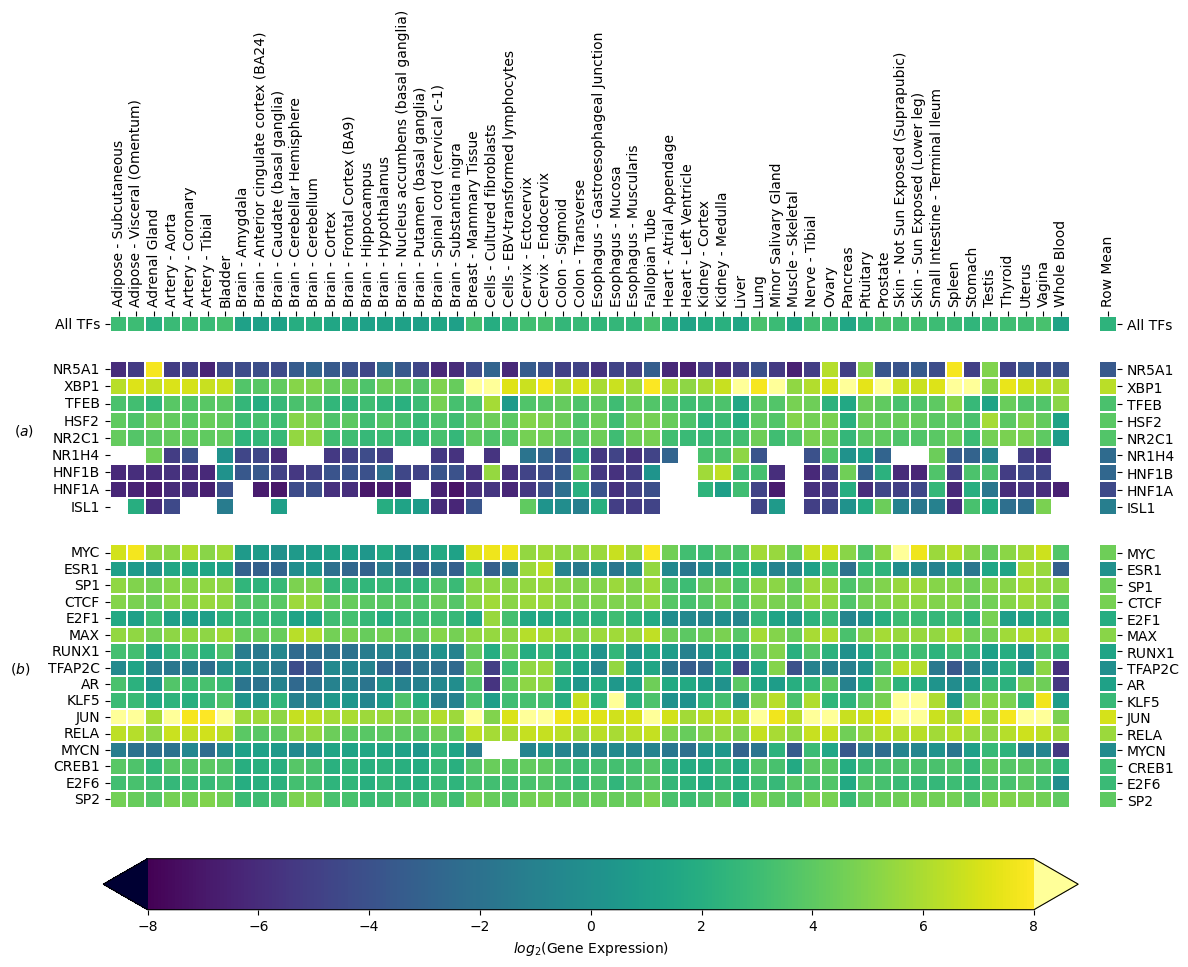

In [46]:
value_min = -8
value_max = 8

my_cmap = plt.get_cmap("viridis").copy()
my_cmap.set_over("#FFFF99")
my_cmap.set_under("#000033")
norm = mpl.colors.Normalize(vmin= value_min, vmax= value_max)

asp = (extreme_df_plot.shape[0] + most_df_plot.shape[0]) /float(extreme_df_plot.shape[1])
figw = 13
figh = figw*asp


gridspec_kw = {"height_ratios":[1,len(extreme_df_plot), len(most_df_plot)], "width_ratios" : [54,1]}
heatmapkws = dict(square=False, cbar=False,  cmap=my_cmap, fmt=".2f", linewidths=0.01, vmin= value_min, vmax= value_max, robust=True)


fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(figw, figh), gridspec_kw=gridspec_kw)

# left = 0.07; right=0.87
# bottom = 0.1; top = 0.9

plt.subplots_adjust(wspace=0.06, hspace=0.2)



# sns.heatmap(mean_log2_expr_per_tissue_copy, cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"$log_2$(Gene Expression)", "extend":"both"}, vmin= value_min, vmax= value_max, robust=True)
# Mean over all tissues - row
sns.heatmap(extreme_df_plot.iloc[:1,:54], ax=axes[0,0], xticklabels=True, yticklabels=True,  **heatmapkws)

# Mean over all Target genes - column
sns.heatmap(extreme_df_plot.iloc[1:,54:], ax=axes[1,1], xticklabels=True, yticklabels=True,  **heatmapkws)
# Normal heatmap
sns.heatmap(extreme_df_plot.iloc[1:,:54], ax=axes[1,0], xticklabels=True, yticklabels=True,  **heatmapkws)
# mean gene expr over all
sns.heatmap(extreme_df_plot.iloc[:1,54:], ax=axes[0,1], xticklabels=True, yticklabels=True,  **heatmapkws)


# PLOT 2

# Mean over all Target genes - column
sns.heatmap(most_df_plot.iloc[1:,54:], ax=axes[2,1], xticklabels=True, yticklabels=True,  **heatmapkws)
# Normal heatmap
sns.heatmap(most_df_plot.iloc[1:,:54], ax=axes[2,0], xticklabels=True, yticklabels=True,  **heatmapkws)



# axes[0,0].set_xlabel('Tissues')
axes[1,0].set_ylabel('$(a)$', rotation=0, labelpad = 20)

# oben mean tissues, x-ticks rotieren und nach oben, unten weg, y-ticks auf keine rotation
axes[0,0].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,0].tick_params(axis="y", labelrotation=0)

# kleines rechteck oben rechts, x ticks drehen und nach oben, unten entfernen, y1-ticks entfernen, y2-ticks auf rechte seite durch len(df_red) also anzahl Target gene insgesamt
axes[0,1].tick_params(axis="x",top=True,labeltop=True, labelbottom=False, bottom=False, labelrotation=90)
axes[0,1].tick_params(axis="y", labelrotation=90)
axes[0,1].set_ylim([0,axes[0,1].get_ylim()[0]])
axes[0,1].set_yticks(axes[0,1].get_yticks())
# axes[0,1].set_yticklabels([17304])
axes[0,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)

# Main Heatmap, x ticks entfernen, y-ticks lassen
axes[1,0].set_xticklabels([])
axes[1,0].set_xticks([])

# rechte lange Spalte
# Hinzufügern der y2-beschriftung mit tf_id_count, entfernen der y1-ticks etc, entfernen der x-ticks
axes[1,1].set_yticks(axes[1,1].get_yticks())
# axes[1,1].set_yticklabels(extreme_id_count_plot.values)
axes[1,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)
axes[1,1].set_xticklabels([])
axes[1,1].set_xticks([])


# PLOT 2 AXES

axes[2,0].set_ylabel('$(b)$', rotation=0, labelpad = 20)
# Main Heatmap, x ticks entfernen, y-ticks lassen
axes[2,0].set_xticklabels([])
axes[2,0].set_xticks([])

# rechte lange Spalte
# Hinzufügern der y2-beschriftung mit tf_id_count, entfernen der y1-ticks etc, entfernen der x-ticks
axes[2,1].set_yticks(axes[2,1].get_yticks())
# axes[2,1].set_yticklabels(most_id_count_plot.values)
axes[2,1].tick_params(axis="y", left=False, labelleft=False, right=True, labelright=True, labelrotation=0)
axes[2,1].set_xticklabels([])
axes[2,1].set_xticks([])


# Colorbar
# cax = fig.add_axes([0.12, 0.9, 0.8, 0.01])
cax = fig.add_axes([0.12,-.05,0.75,0.08])
sm = mpl.cm.ScalarMappable(cmap=my_cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cax, extend='both', orientation="horizontal", location="bottom", label="$log_2$(Gene Expression)")
# plt.tight_layout()
# plt.savefig(r"../images_BA/tf_heatmap_extreme_and_most.pdf", bbox_inches = 'tight')